In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from random import sample

# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
## Read in Data
flight = pd.read_csv("flight.csv")
flight

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1
129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4
129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3
129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5


To start, you could try making a histogram or a boxplot of `coach_price` using the seaborn `histplot()` or `boxplot()` function. 

After plotting, you could calculate the mean and median of this column using the pandas methods `.mean()` and `.median()`.

Once you’ve created at least one visualization and calculated some summary statistics for the column, think about where \$500 falls in the distribution of `coach_price`: Is it close to the mean or median (in the center of the histogram or box plot)? Or is it far away (in the tail of the histogram or box plot)?


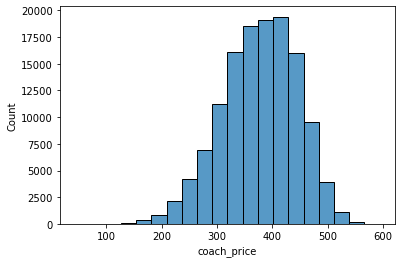

In [3]:
## Task 1

sns.histplot(flight.coach_price, bins=20)
plt.show()

In [4]:
np.mean(flight.coach_price)

376.5852530821279

In [5]:
np.median(flight.coach_price)

380.56

*\\$500 would be a higher price for coach tickets.*

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

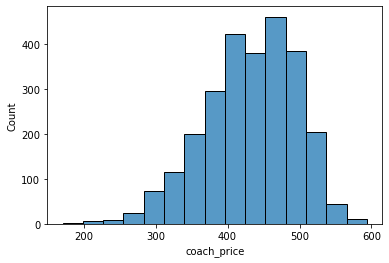

In [6]:
## Task 2
# You can subset the data within the desired plotting function.
sns.histplot(flight.coach_price[flight.hours == 8], bins=15)
plt.show()


In [7]:
np.mean(flight.coach_price[flight.hours == 8])

431.8343773728164

In [8]:
np.median(flight.coach_price[flight.hours == 8])

437.115

*A $500 ticket is slightly more reasonable, but still a bit high.*

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [9]:
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


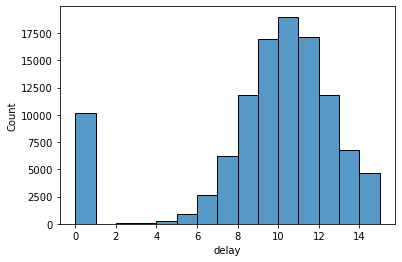

In [10]:
## Task 3
sns.histplot(flight.delay[flight.delay <= 15], bins=15)
plt.show()

In [11]:
np.mean(flight.delay[flight.delay <= 15])

9.10622010453026

In [12]:
np.median(flight.delay[flight.delay <= 15])

10.0

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [13]:
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


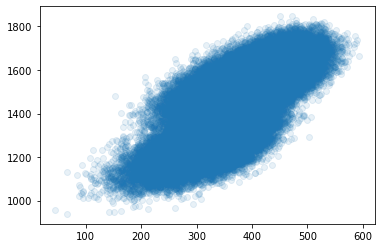

In [14]:
## Task 4
plt.scatter(x=flight.coach_price, y=flight.firstclass_price, alpha = 0.1)
plt.show()

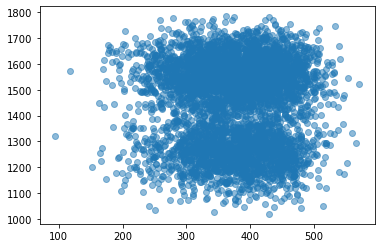

In [15]:
plt.scatter(x=flight.coach_price.sample(n = 5000), y=flight.firstclass_price.sample(n=5000), alpha = 0.5)
plt.show()


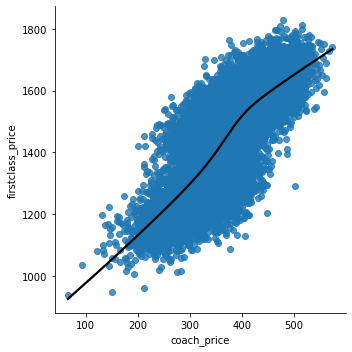

In [16]:
# sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = flight, line_kws={'color': 'black'}, lowess=True)
# plt.show()

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [17]:
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


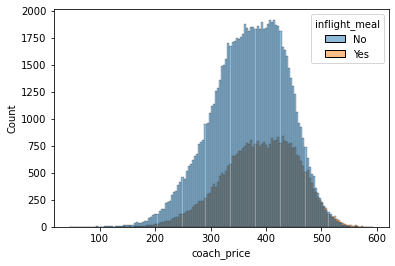

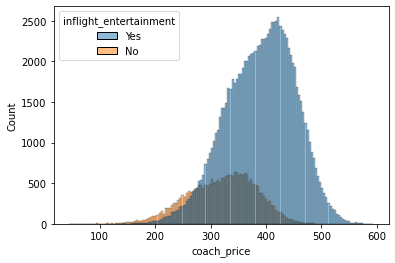

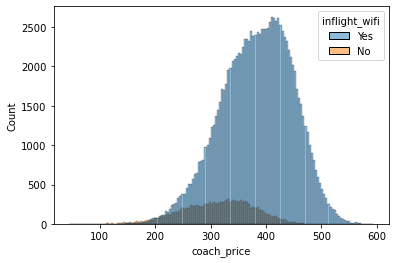

In [18]:
## Task 5
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()



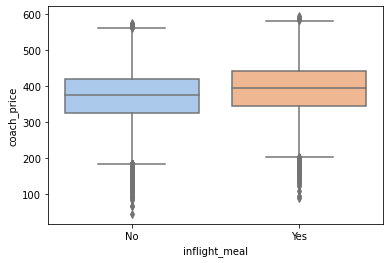

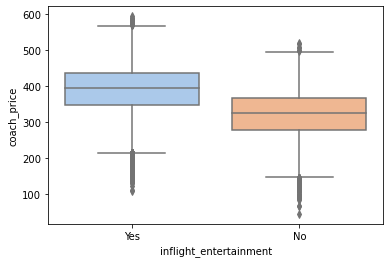

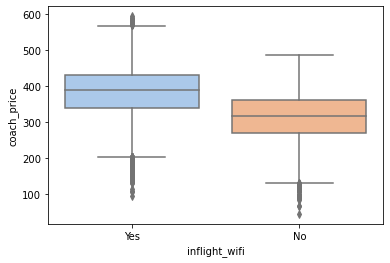

In [19]:
sns.boxplot(x = 'inflight_meal', y = "coach_price", palette = "pastel", data = flight)
plt.show()
plt.clf()

sns.boxplot(x = 'inflight_entertainment', y = "coach_price", palette = "pastel", data = flight)
plt.show()
plt.clf()

sns.boxplot(x = 'inflight_wifi', y = "coach_price", palette = "pastel", data = flight)
plt.show()


6. How does the number of passengers change in relation to the length of flights?

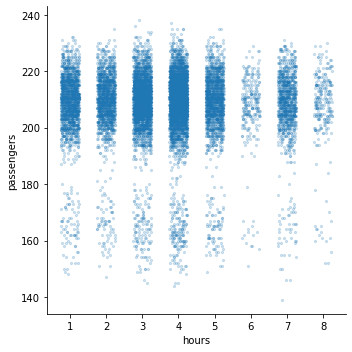

In [20]:
## Task 6
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

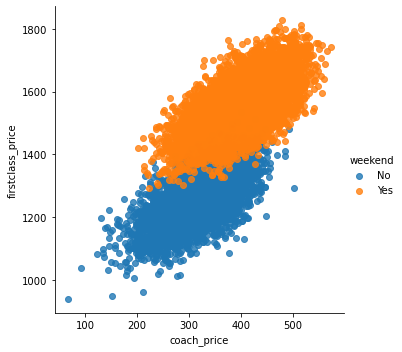

In [21]:
## Task 7
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False)
plt.show()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

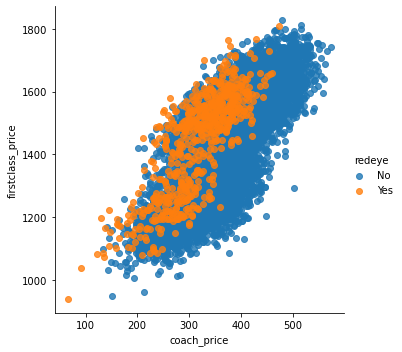

In [22]:
## Task 8
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'redeye', data = flight_sub, fit_reg=False)
plt.show()

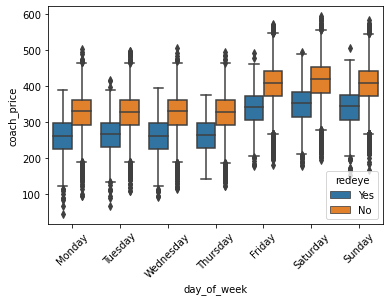

In [23]:
# days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()
